In [1]:
from vnstock import Vnstock
import talib as ta 
import mplfinance as mpf
import pandas as pd
import numpy as np

In [2]:
stock = Vnstock().stock(symbol = 'AAA')
df = stock.quote.history(start = '2022-01-01', end = '2025-01-01', interval = '1D')
df['time'] = pd.DatetimeIndex(df['time'])
df.set_index('time', inplace=True)
# print(df)

In [3]:
cci = ta.CCI(df['high'], df['low'], df['close'], timeperiod=14)

In [4]:
def BuySignalPlotData():
    import numpy as np 
    signal = []
    for i in range(len(cci)):  
        if cci[i] > -100 and cci[i-1] < -100:
            signal.append(df['close'][i])
        else:
            signal.append(np.nan)
    signal = pd.Series(signal, index=df.index)
    return signal

In [5]:
def SellSignalPlotData():
    import numpy as np 
    signal = []
    for i in range(len(cci)):  
        if cci[i] < 100 and cci[i-1] > 100:
            signal.append(df['close'][i])
        else:
            signal.append(np.nan)
    signal = pd.Series(signal, index=df.index)
    return signal

In [6]:
buy = BuySignalPlotData()
sell = SellSignalPlotData()
print(buy)

time
2022-01-04   NaN
2022-01-05   NaN
2022-01-06   NaN
2022-01-07   NaN
2022-01-10   NaN
              ..
2024-12-25   NaN
2024-12-26   NaN
2024-12-27   NaN
2024-12-30   NaN
2024-12-31   NaN
Length: 748, dtype: float64


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


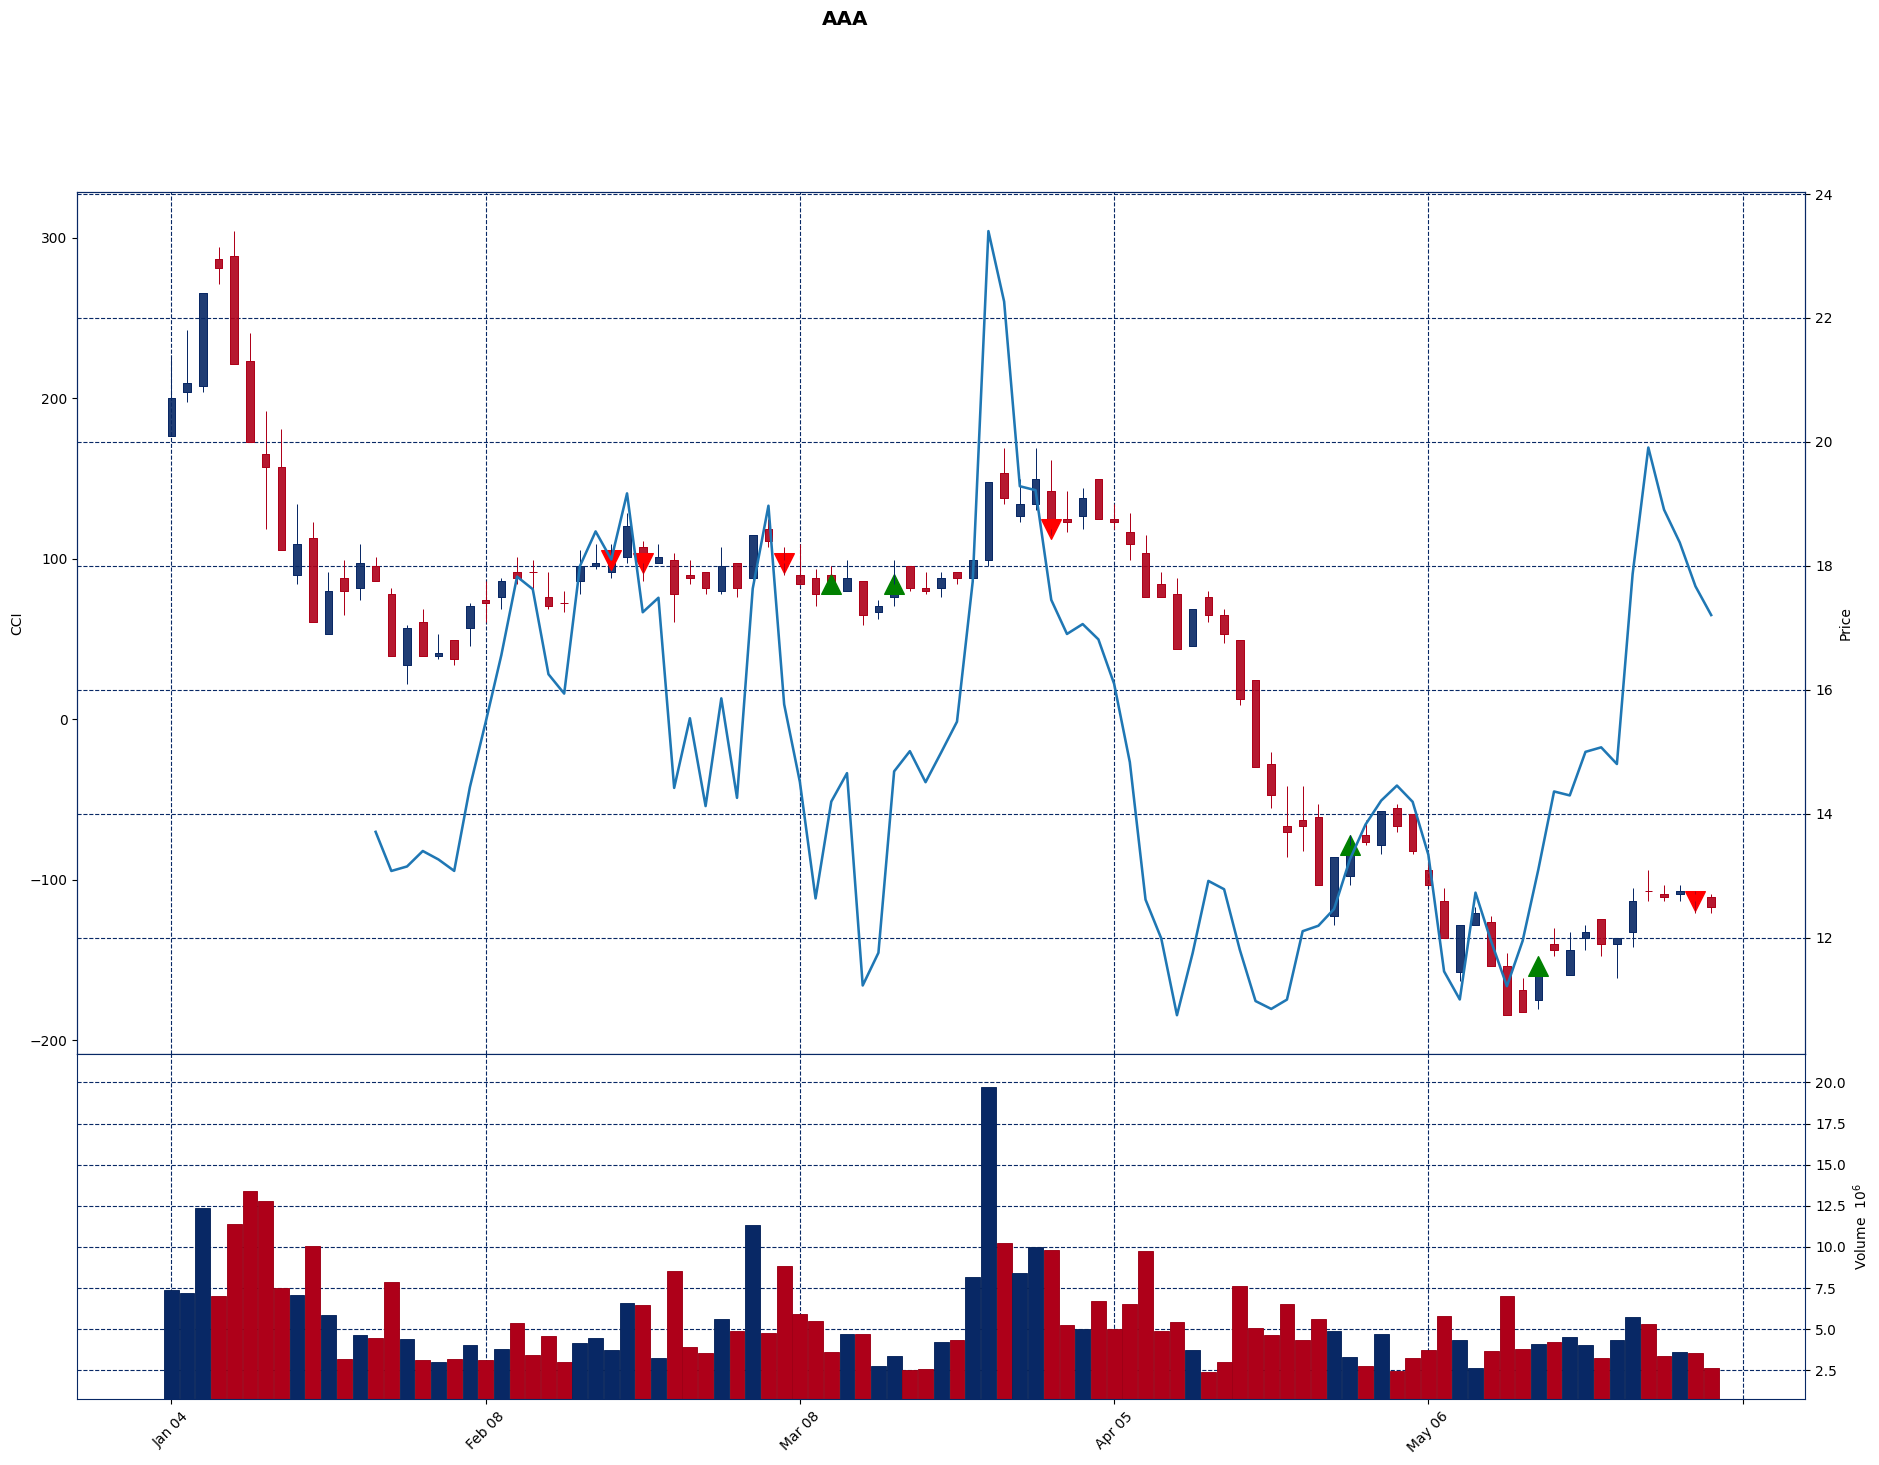

In [7]:
mpf.plot(df.loc['2022-01-01':'2022-06-01'], type='candle', style='starsandstripes', 
         title='AAA', ylabel='Price', volume=True, 
         addplot=
         [
            mpf.make_addplot(buy.loc['2022-01-01':'2022-06-01'], type='scatter', markersize=200, marker='^', color='g'),
            mpf.make_addplot(sell.loc['2022-01-01':'2022-06-01'], type='scatter', markersize=200, marker='v', color='r'),
            mpf.make_addplot(cci.loc['2022-01-01':'2022-06-01'], panel=0, secondary_y=True, ylabel='CCI'),
         ],
         figscale = 3,
         )